CREDIT CARD FRAUD DETECTION

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Sample Dataset
data = { 'Feature1': np.random.randn(1000), 
        'Feature2': np.random.randn(1000), 
        'Feature3': np.random.randn(1000), 
        'Feature4': np.random.randn(1000), 
        'Class': np.random.choice([0, 1], size=1000, p=[0.95, 0.05]) # Imbalanced dataset 
       }
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)
print(df.head())

   Feature1  Feature2  Feature3  Feature4  Class
0  1.447085  0.408563 -0.397634 -1.462545      0
1  0.347546 -1.092879  0.094386  0.779300      0
2  1.054467  0.852905 -1.435766 -0.776828      0
3  0.175099  0.165191  0.697158 -0.707061      0
4 -0.845673 -0.233116  2.599038  0.666182      0


In [5]:
# Data preparation
X = df.drop('Class', axis=1) # Features
y = df['Class'] # Target variable

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [10]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       286
           1       0.00      0.00      0.00        14

    accuracy                           0.95       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.91      0.95      0.93       300



In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[285   1]
 [ 14   0]]


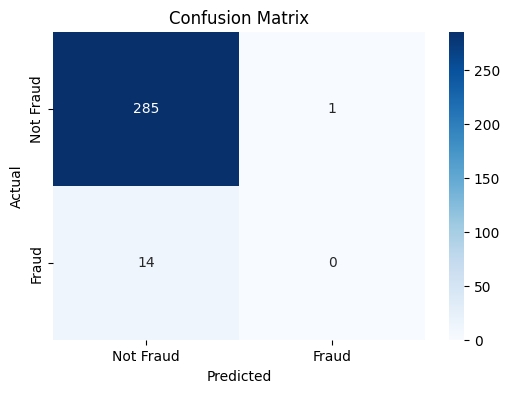

In [12]:
# Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

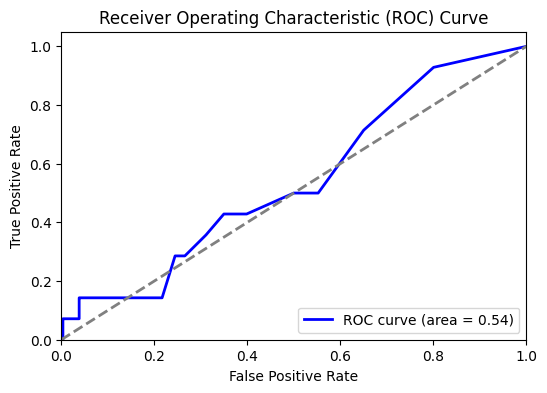

In [18]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()